**Downloading Kaggle data sets directly into Colab**

In [ ]:
#Install the kaggle python library
! pip install kaggle

uploading kaggle.jason file from local system

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"o215011","key":"b08bf708956dc241e57aeaf287cece97"}'}

creating a kaggle folder

In [ ]:
! mkdir ~/.kaggle

coopying the kaggle.jason to folder we created

In [ ]:
! cp kaggle.json ~/.kaggle/

permission for the json to act

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

listing all datasets in kaggle

In [ ]:
! kaggle datasets list

ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                         1MB  2024-04-10 09:48:38          20840        461  1.0              
jainaru/world-happiness-report-2024-yearly-updated               World Happiness Report- 2024                       62KB  2024-05-15 19:04:34           1515         30  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                     2MB  2024-04-29 19:29:56           5376        112  1.0              
jainaru/thyroid-disease-data                                     

downloading the dataset

In [ ]:
!kaggle datasets download 'ejlok1/toronto-emotional-speech-set-tess'

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 97% 417M/428M [00:04<00:00, 88.4MB/s]
100% 428M/428M [00:04<00:00, 100MB/s] 


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS Toronto emotional 

importing the modules

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


load the dataset


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)


2800

the path and of any number of items

In [ ]:
paths[:5]

['TESS Toronto emotional speech set data/OAF_Sad/OAF_long_sad.wav',
 'TESS Toronto emotional speech set data/OAF_Sad/OAF_choice_sad.wav',
 'TESS Toronto emotional speech set data/OAF_Sad/OAF_gun_sad.wav',
 'TESS Toronto emotional speech set data/OAF_Sad/OAF_when_sad.wav',
 'TESS Toronto emotional speech set data/OAF_Sad/OAF_cause_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

creating dataframe

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS Toronto emotional speech set data/OAF_Sad...,sad
1,TESS Toronto emotional speech set data/OAF_Sad...,sad
2,TESS Toronto emotional speech set data/OAF_Sad...,sad
3,TESS Toronto emotional speech set data/OAF_Sad...,sad
4,TESS Toronto emotional speech set data/OAF_Sad...,sad


cheaking the number of labels

In [ ]:
df['label'].value_counts()


label
sad        400
angry      400
neutral    400
fear       400
happy      400
disgust    400
ps         400
Name: count, dtype: int64

**Exploratory Data Analysis**

<Axes: xlabel='label', ylabel='count'>

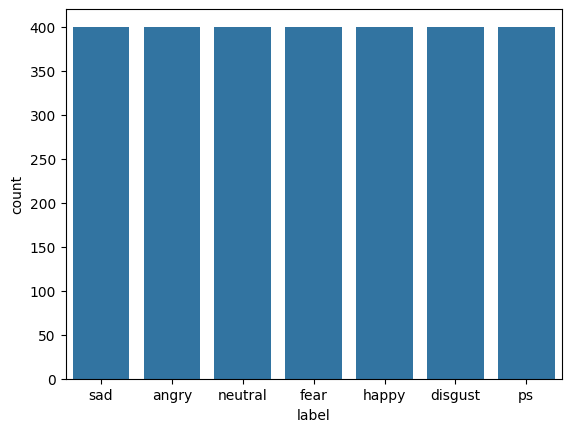

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

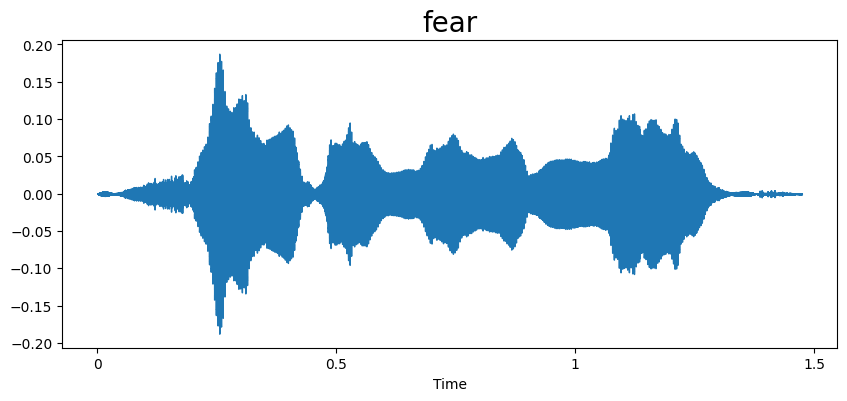

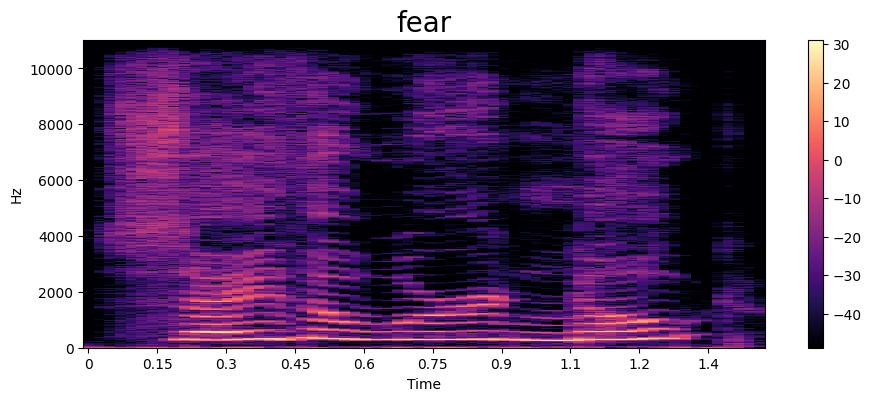

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

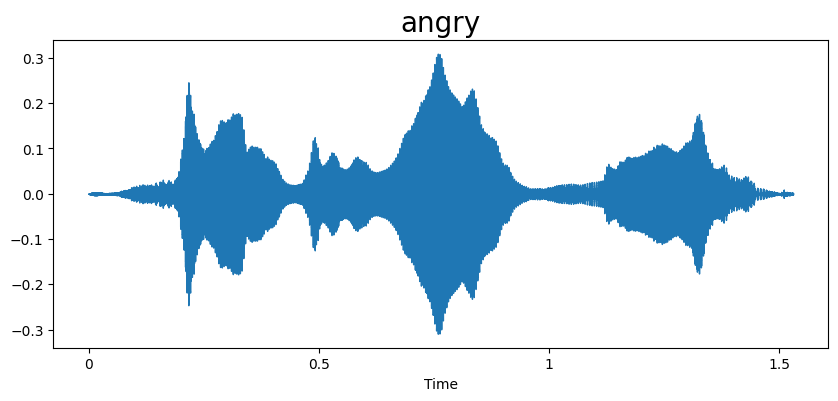

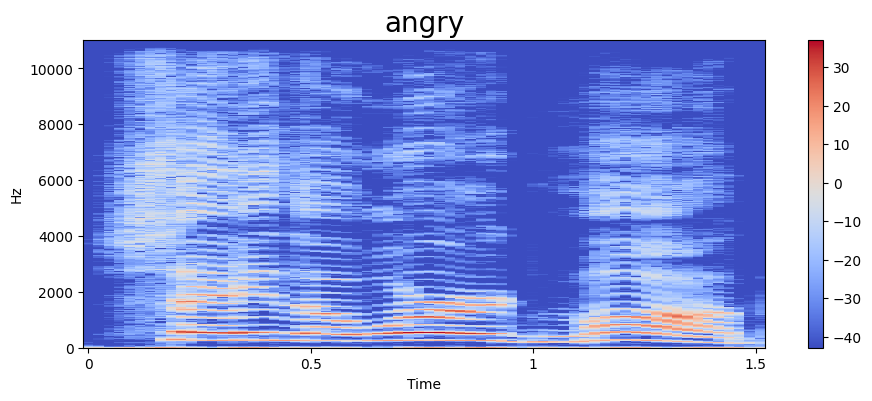

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

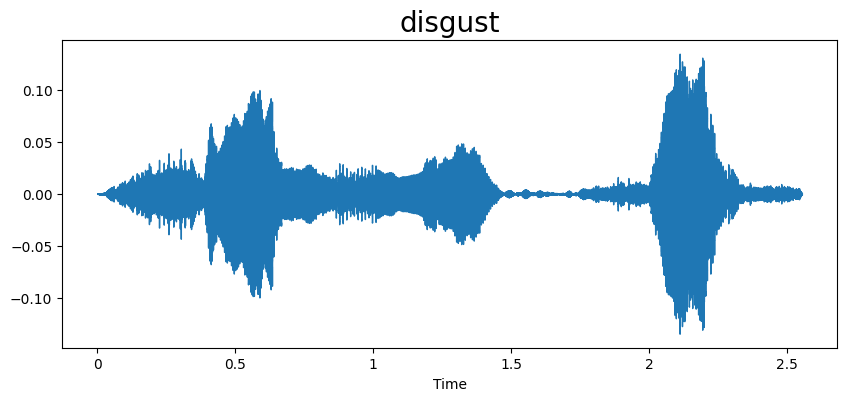

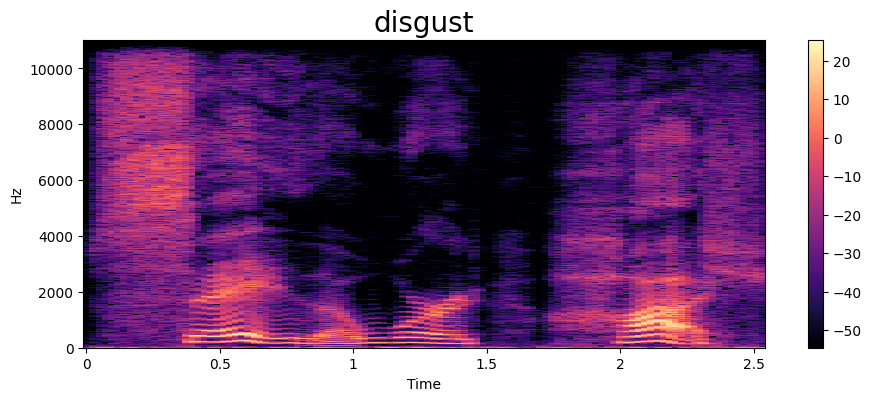

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

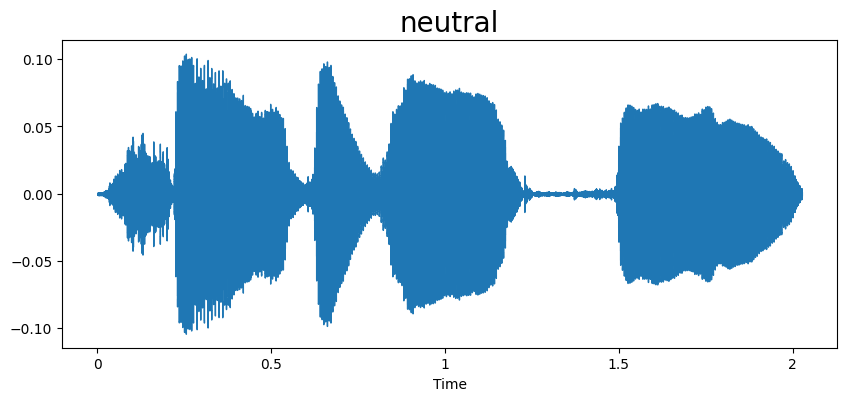

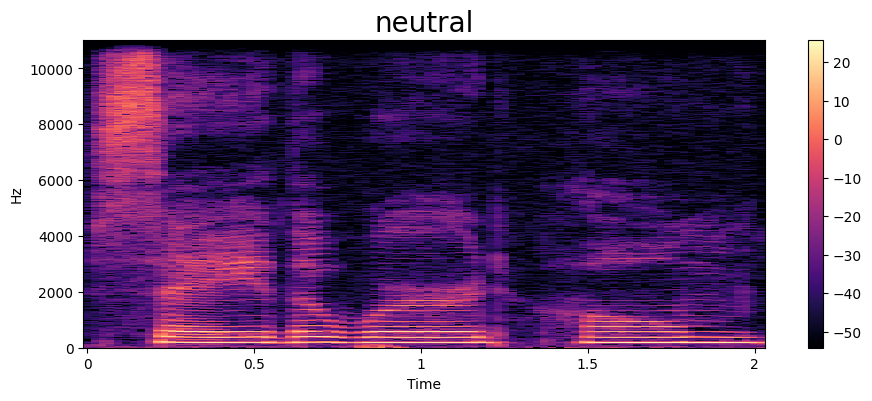

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

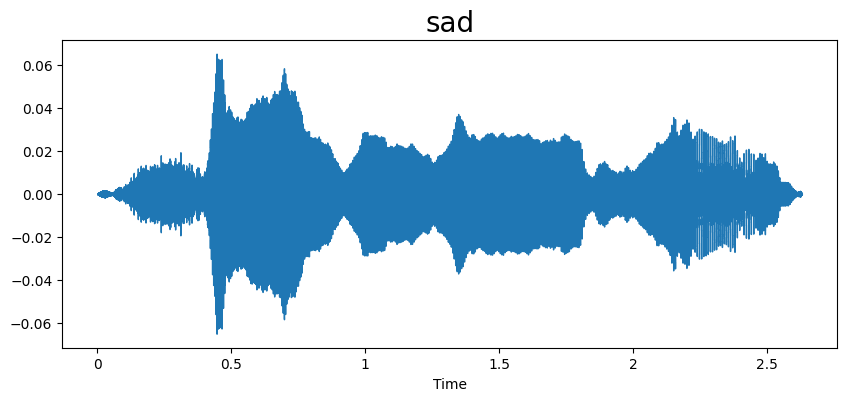

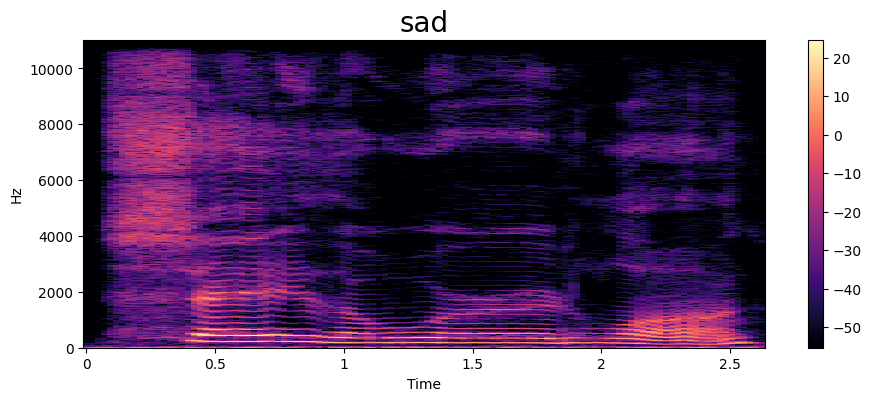

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

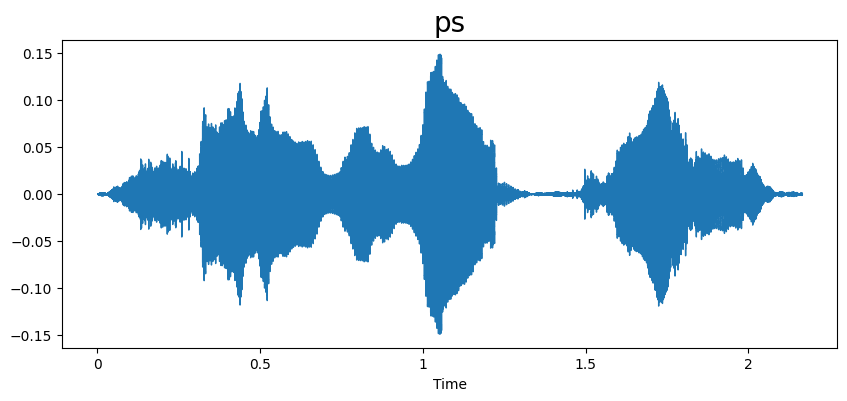

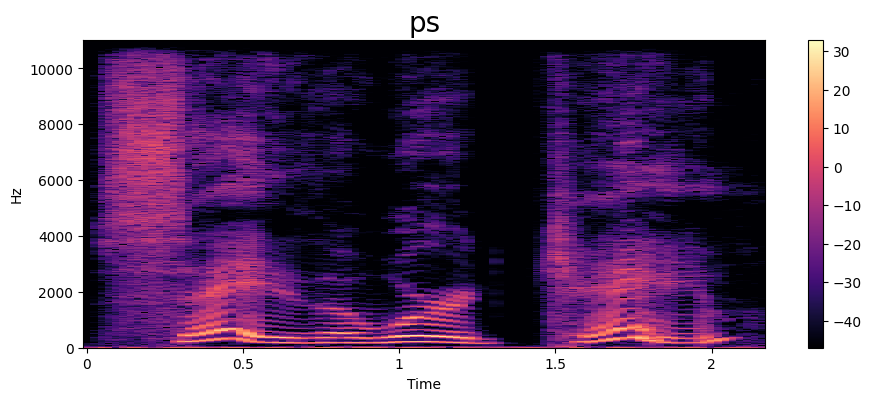

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

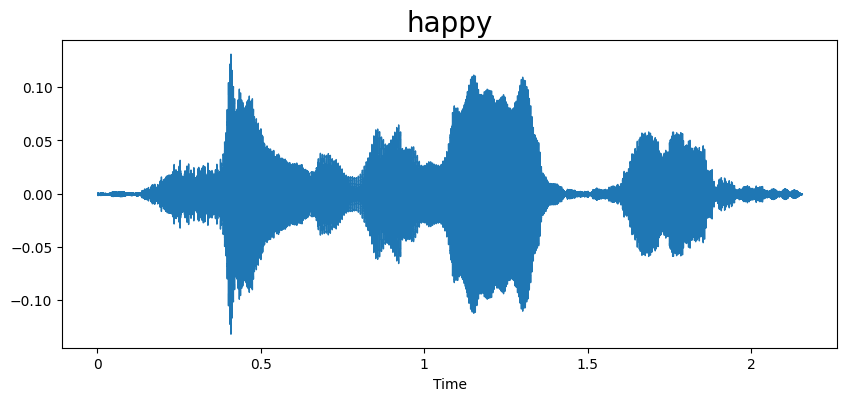

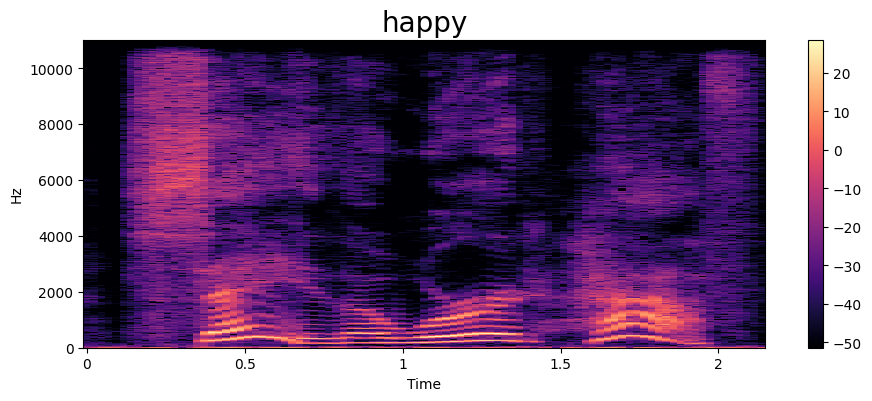

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**Feature Extraction**

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-5.23556885e+02,  1.18091934e+02,  3.99933434e+01,  6.97309542e+00,
        9.98477364e+00,  6.88420582e+00, -1.01395178e+01, -1.07735348e+01,
       -2.18985519e+01, -1.69345009e+00, -1.64567776e+01,  1.59909141e+00,
       -5.37362385e+00,  5.63962698e+00,  2.90233463e-01, -6.36956120e+00,
        2.86147976e+00, -1.03503978e+00,  4.83695418e-01, -5.92976046e+00,
        5.36615801e+00, -1.36036411e-01, -5.87610054e+00,  1.33421373e+00,
       -1.35119295e+01,  5.18158913e+00, -1.02391539e+01,  3.48961860e-01,
       -1.80336308e+00,  2.74434829e+00,  5.33937693e+00,  8.61290836e+00,
        1.12037432e+00,  3.33622551e+00, -3.10606122e+00, -2.66038442e+00,
        9.03542805e+00,  1.29371891e+01,  2.03695660e+01,  2.60705166e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-523.5569, 118.091934, 39.993343, 6.9730954, ...
1       [-540.3313, 85.31815, 20.553743, 20.438261, 16...
2       [-529.30475, 109.1448, 28.02172, 9.923079, 20....
3       [-530.39307, 120.11345, 33.862976, 14.822116, ...
4       [-536.6573, 101.85888, 23.28402, 4.186773, 10....
                              ...                        
2795    [-338.20163, 47.334282, -20.543129, 16.325531,...
2796    [-321.95734, 43.33507, -22.015924, 34.54912, -...
2797    [-339.7116, 64.23509, -17.152596, 26.155676, 8...
2798    [-331.11884, 48.135372, -18.037813, 18.68998, ...
2799    [-328.36664, 44.600613, -14.2474785, 35.965908...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

**Create the LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 9s 179ms/step - loss: 0.9576 - accuracy: 0.6554 - val_loss: 4.8004 - val_accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 7s 214ms/step - loss: 0.2635 - accuracy: 0.9237 - val_loss: 4.4376 - val_accuracy: 0.0982
Epoch 3/50
35/35 [==============================] - 6s 160ms/step - loss: 0.2257 - accuracy: 0.9281 - val_loss: 4.3525 - val_accuracy: 0.1589
Epoch 4/50
35/35 [==============================] - 7s 208ms/step - loss: 0.1418 - accuracy: 0.9536 - val_loss: 4.2816 - val_accuracy: 0.1607
Epoch 5/50
35/35 [==============================] - 6s 165ms/step - loss: 0.1111 - accuracy: 0.9625 - val_loss: 4.5876 - val_accuracy: 0.1821
Epoch 6/50
35/35 [==============================] - 7s 207ms/step - loss: 0.1020 - accuracy: 0.9723 - val_loss: 4.8410 - val_accuracy: 0.2607
Epoch 7/50
35/35 [==============================] - 6s 167ms/step - loss: 0.0681 - accuracy: 0.9812 - val_loss: 4.3024 - val_accuracy: 0.2464
Ep

**Plot the results**

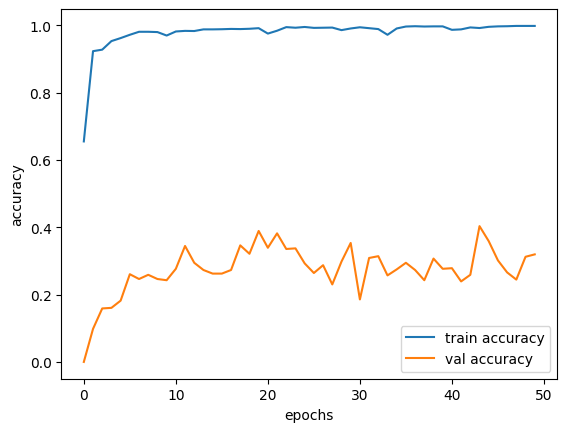

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

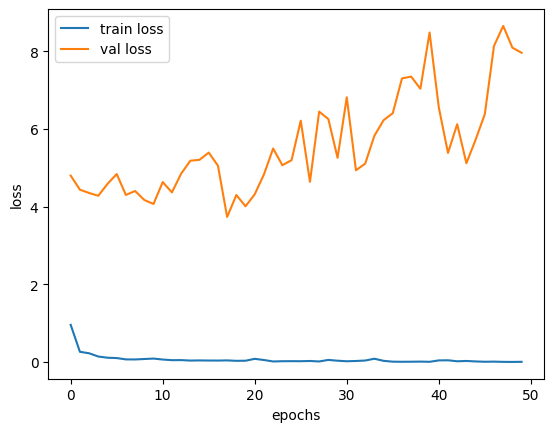

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 40, 256)           133120    
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 40, 256)           0         
                                                                 
 batch_normalization_2 (Bat  (None, 40, 256)           1024      
 chNormalization)                                                
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                      

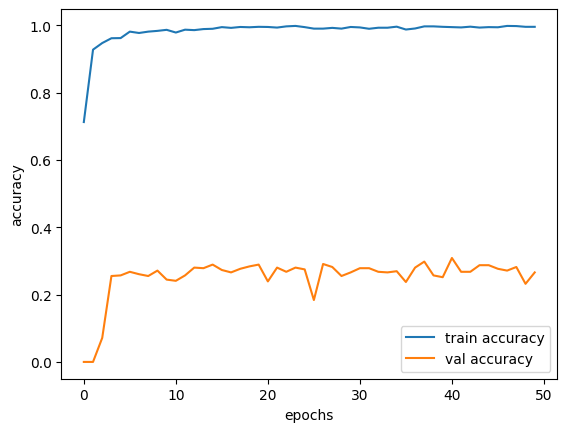

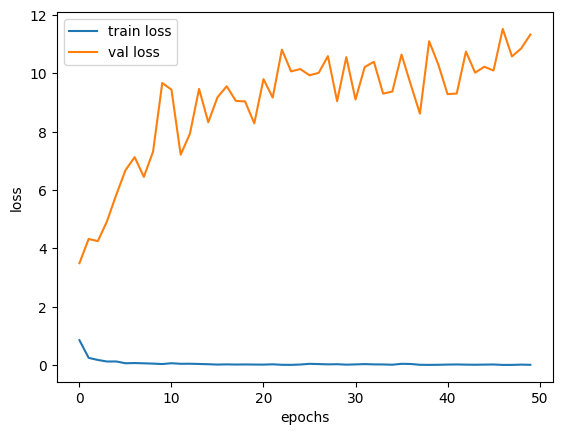

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional, BatchNormalization, LeakyReLU
import matplotlib.pyplot as plt

# Prepare the input data
X = np.expand_dims(X, -1)  # Ensure the shape is (num_samples, 40, 1)
y = enc.fit_transform(df[['label']]).toarray()  # One-hot encode the labels

# Modified model
new_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(40, 1)),
    Dropout(0.3),
    BatchNormalization(),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

new_model.summary()

new_history = new_model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

# Plotting accuracy
new_epochs = list(range(50))
new_acc = new_history.history['accuracy']
new_val_acc = new_history.history['val_accuracy']

plt.plot(new_epochs, new_acc, label='train accuracy')
plt.plot(new_epochs, new_val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting loss
new_loss = new_history.history['loss']
new_val_loss = new_history.history['val_loss']

plt.plot(new_epochs, new_loss, label='train loss')
plt.plot(new_epochs, new_val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
